# MonkeyMadness

## Start by enabling the GPU: (Deep learning requires many computations and the training time will be much faster if we do it on the GPU)
1. Go to "RunTime" menu and select 
2. "Change runtime type." A dialog box will appear where you can choose the runtime type and hardware accelerator.
3. Select "GPU" as the hardware accelerator and click "Save."

In [ ]:
# Check if GPU is available
!nvidia-smi

import torch

if torch.cuda.is_available():
    print(f"GPU is available: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is not available.")

# Setup environment and enable GPU

In [ ]:
!git clone https://github.com/Cizako/Classification-Game.git
import os
HOME = os.getcwd()
print(HOME)
%cd {HOME}/Classification-Game

%pip install req_colab.txt

# Supervised Learning

In this task, you will use supervised learning to classify images of monkeys. Supervised learning is one of the three main areas of machine learning.  

Supervised learning is like teaching the computer to recognize monkeys by using flashcards.  

1. **Labeled Data**: You show the computer images of monkeys and tell it which species each one is (e.g., "This is a chimpanzee").  
2. **Training**: The computer studies these examples to learn patterns.  
3. **Comparison**: It makes a prediction of the image and then compares it to the labeled data. It will be penalized based on how "wrong" it is.  
4. **Prediction**: Once trained, it can look at a new image and guess the species of the monkey based on what it learned.  

It’s called “supervised” because the model learns under guidance (the labeled data).  

## There are some main ingredients:

1. **Data**  
    - The data has to be labeled, i.e., someone has to manually note down what monkey is present in the image.  

2. **Model**  
    - It is the model that makes predictions. It does so by looking at the input and making a guess about what monkey is present. The model consists of mathematical operations and weights (these are adjustable). In this task we will use so called Convolutional Neural Network which are very good at handling image data.

3. **Loss Function**  
    - Somehow we need to tell the computer how wrong the guess is.  
    - The model will output probabilities for each monkey class. Let’s say it sees an image of an orangutan, then it could perhaps output the following:  

        ```markdown
        Chimpanzee: 0.70 (70%)  
        Orangutan: 0.20 (20%)  
        Other monkeys: 0.10 (10%)  
        ```

        The correct label is orangutan (100% probability), but the model guessed only 20% for this class.

        Using a loss function like Cross-Entropy Loss, the score is calculated to show how wrong the prediction is
        The closer the prediction is to 1 (100%), the smaller the loss. 
        The goal is to adjust the model to make higher confidence predictions for the correct class.
4. **Optimizer**
    - Somehow we need to adjust the model to perform better. This is done by calculating, based on the loss how the model should be adjusted.

# What is a convolution? 


The convolution is like sliding a small "window" (called a kernel or filter) over an image to look for patterns.

Here's how it works step-by-step:

Kernel: Think of this as a small grid of numbers (e.g., 3x3).
Slide and Multiply: Place the kernel on part of the image. Multiply the numbers in the kernel with the corresponding numbers in the image under it.
Sum Up: Add the results of the multiplication together. This gives one number for that position.
Move the Kernel: Slide the kernel to the next part of the image and repeat.
The result is a new image (called a feature map) that highlights certain patterns like edges or textures.



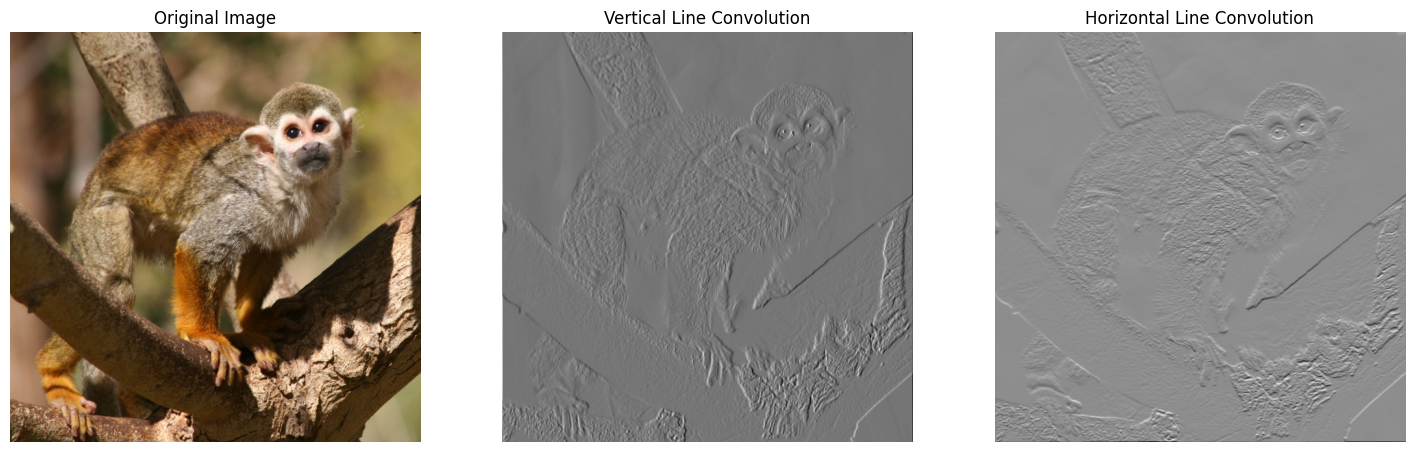

In [1]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Load the image
image_path = 'Monkey/training/training/n7/n7023.jpg'
image = Image.open(image_path).convert("RGB")

# Transform the image to a tensor
transform = transforms.ToTensor()
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Define a vertical line kernel
# Define a vertical line kernel
# Define vertical and horizontal line detection kernels
vertical_line_kernel = torch.tensor([[-1.0, 0.0, 1.0],
                                     [-1.0, 0.0, 1.0],
                                     [-1.0, 0.0, 1.0]], dtype=torch.float32)

horizontal_line_kernel = torch.tensor([[-1.0, -1.0, -1.0],
                                       [0.0,  0.0,  0.0],
                                       [1.0,  1.0,  1.0]], dtype=torch.float32)

# Expand kernels to match RGB channels
vertical_line_kernel = vertical_line_kernel.expand(1, 3, 3, 3)
horizontal_line_kernel = horizontal_line_kernel.expand(1, 3, 3, 3)

# Apply the vertical and horizontal kernels to each channel
vertical_convolved = F.conv2d(image_tensor, vertical_line_kernel, padding=1)
horizontal_convolved = F.conv2d(image_tensor, horizontal_line_kernel, padding=1)


# Convolve the image with the vertical line kernel

# Remove the batch dimension and convert to a NumPy array for visualization
vertical_convolved = vertical_convolved.squeeze().detach().numpy()
horizontal_convolved = horizontal_convolved.squeeze().detach().numpy()
# Plot the original and convolved images side by side
# Plot the original image, vertical lines, and horizontal lines
plt.figure(figsize=(18, 6))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# Vertical line convolution
plt.subplot(1, 3, 2)
plt.imshow(vertical_convolved, cmap="gray")
plt.title("Vertical Line Convolution")
plt.axis("off")

# Horizontal line convolution
plt.subplot(1, 3, 3)
plt.imshow(horizontal_convolved, cmap="gray")
plt.title("Horizontal Line Convolution")
plt.axis("off")

plt.show()

# Dataset. 
### You will use a monkey dataset consisting of ca 1000 images of monkey. The goal is to be able to classify them.
### There are ten monkey classes


1097
767


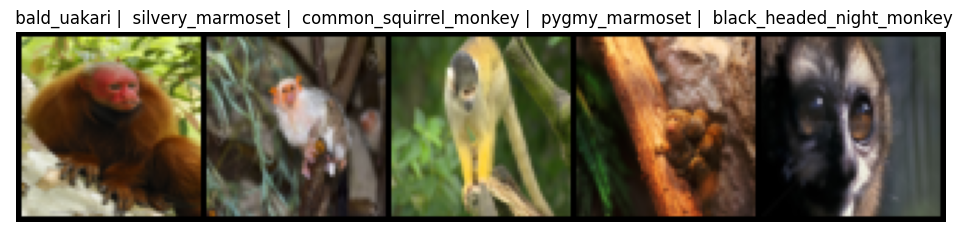

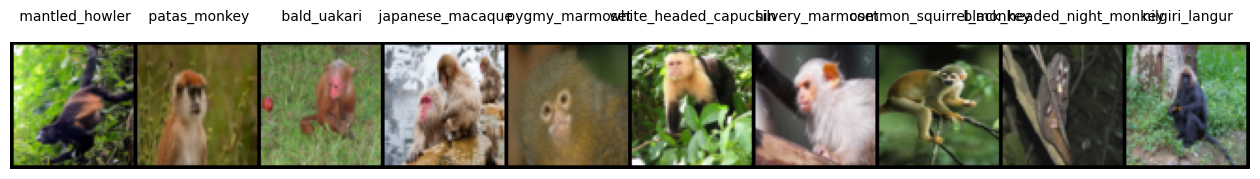

In [2]:
from torchvision import transforms, utils
from Dataset import CustomImageDataset, MonkeyImageDataset

NUM_OF_CLASSES = 10
IMAGE_SIZE = (64, 64)
DATA_PERCENTAGE = 0.7
transform = transforms.Compose([
    #Randomly flip the images vertically
    #transforms.RandomVerticalFlip(p=0.2),  # Randomly flip the image vertically with 20% probability
    #transforms.RandomHorizontalFlip(p=0.2),  # Randomly flip the image horizontally with 20% probability
    #transforms.RandomRotation(degrees=15),  # Rotate the image randomly within a 15-degree range
    #transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Randomly change brightness, contrast, etc.
    transforms.ToTensor(),
    transforms.Resize((IMAGE_SIZE[0], IMAGE_SIZE[1])), 

    #for imagenet
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
#dataset = CustomImageDataset('Monkey/training/training', transform=transform, amount_of_classes=NUM_OF_CLASSES, data_percentage=0.3)
dataset = MonkeyImageDataset('Monkey/training/training', transform, NUM_OF_CLASSES, data_percentage = DATA_PERCENTAGE )
dataset.visualize(5)


dataset.visualize_all_classes()


# Let's define our model! 
### Lets build a Convolutional Neural Network (CNN). It uses convolutions (one can think of it as filters) to learn the different classes

In [ ]:
#define model

import torch.nn as nn
import torch.nn.functional as F
import torch

class MonkeyNET(nn.Module):
    def __init__(self, num_classes=10, input_size=(500, 500), dropout_rate=0.5):
        super(MonkeyNET, self).__init__()
        
        # First convolutional layer: 3 input channels (RGB), 32 output channels, kernel size 5, padding 2 to preserve size
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=2)
        
        # Second convolutional layer: outputs a 32-channel feature map
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        
        ## Third convolutional layer: further reduces spatial dimensions
        #self.conv3 = nn.Conv2d(64, 128, kernel_size=5, padding=2)

        # Dropout layers
        self.dropout1 = nn.Dropout2d(p=dropout_rate)  # Spatial dropout for convolutional layers
        self.dropout2 = nn.Dropout(p=dropout_rate)
        self.dropout3 = nn.Dropout(p=dropout_rate)    # Regular dropout for fully connected layers


        # Calculate the size of the fully connected layer dynamically
        self.fc_input_size = self._get_fc_input_size(input_size)
        self.fc1 = nn.Linear(self.fc_input_size, 64)  # Adjusted for the final size after pooling
        
        # Prediction layer
        self.prediction = nn.Linear(64, num_classes)
        
    def _get_fc_input_size(self, input_size):
        x = torch.zeros(1, 3, *input_size)  # Create a dummy input tensor
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2)
        #x = F.relu(self.conv3(x))
        #x = F.max_pool2d(x, kernel_size=2)
        return x.numel()  # Total number of elements after conv layers
    
    def forward(self, x):
        # First conv -> ReLU -> Max Pooling
        x = F.relu(self.conv1(x))
        x = self.dropout1(x)  # Apply spatial dropout

        x = F.max_pool2d(x, kernel_size=2, stride=2)

        #Second conv -> ReLU -> Max Pooling
        x = F.relu(self.conv2(x))
        x = self.dropout3(x)
        x = F.max_pool2d(x, kernel_size=2)

        # Third conv -> ReLU -> Max Pooling
        #x = F.relu(self.conv3(x))
        #x = F.max_pool2d(x, kernel_size=2)


        # Flatten the tensor for fully connected layer
        x = x.view(x.size(0), -1)  # Output: (batch_size, 128 * 16 * 16) for 500x500 input

        # Fully connected layer -> ReLU
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)  # Apply regular dropout before final layer


        # Output layer (no activation, to be combined with a loss function later)
        x = self.prediction(x)
        # Optionally remove Softmax from here
        return x
    



# See the summary of the model in a compact way:

In [ ]:
from torchsummary import summary
import torchlens as tl
import graphviz
from IPython.display import Image



model = MonkeyNET(num_classes=NUM_OF_CLASSES, input_size=IMAGE_SIZE)

summary(model, (3, IMAGE_SIZE[0], IMAGE_SIZE[1]))

# ---- Uncomment the lines below to get a visual of the model ------
# graphviz.set_jupyter_format('png')
# x = torch.rand(1, 3, IMAGE_SIZE[0], IMAGE_SIZE[1])
# model_hist = tl.log_forward_pass(model,x, vis_opt='unrolled')
# model_graph.visual_graph

In [ ]:
from train import train, training_info
from test_model import test
import torch.optim
from torch.utils.data import DataLoader, random_split
import torch.nn as nn

# Check if CUDA (GPU) is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using CUDA (GPU)")

# Check if MPS (Metal Performance Shaders for macOS) is available (for Apple Silicon Macs)
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using MPS (Apple GPU)")

# Fallback to CPU if neither CUDA nor MPS is available
else:
    device = torch.device("cpu")
    print("Using CPU")

START_EPOCH = 0
EPOCHS = 2 # how long should the model train
MODEL_NAME = "drop_0.5 two layers"
ID = 2213
LR = 0.01 # how "much" should the model learn
BATCH_SIZE = 8# how many images should the model see before updating

model_info = {
            'epochs' : EPOCHS,
            'batch_size' : BATCH_SIZE,
            'lr' : LR,
            'ID' : ID,
            'model_name' : MODEL_NAME

}

dataset_size = len(dataset)
train_size = int(0.8 * dataset_size)  # 80% for training
val_size = dataset_size - train_size   # 20% for validation
if NUM_OF_CLASSES > 2:
    criterion = nn.CrossEntropyLoss()
else:
    criterion = nn.BCELoss()


print(train_size, val_size)

# Split the dataset
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders for training and validation sets
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Initialize the model
model1 = MonkeyNET(num_classes=NUM_OF_CLASSES, input_size=IMAGE_SIZE, dropout_rate=0.1)


# Create optimizers for the model. This will try to find the optimal parameters in the model i.e this adjusts the model to improve the loss
optimizer1 = torch.optim.SGD(model1.parameters(), lr=LR)

# Move models to gpu and train 
model1.to(device)
model1, t_loss, t_acc, v_loss, v_acc = train(model1, train_loader, val_loader, optimizer1, criterion, device, start_epoch=START_EPOCH, num_epochs=EPOCHS, model_name=MODEL_NAME, unique_id=ID)

test_dataset = MonkeyImageDataset('Monkey/validation/validation', transform, NUM_OF_CLASSES, 1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)



model_info['t_loss'] = t_loss
model_info['t_acc'] = t_acc

model_info['v_loss'] = v_loss
model_info['v_acc'] = v_acc

training_info(model_info=model_info)

# see metrics on the validation set

acc = test(model=model1, testloader=val_loader, device=device, model_name=MODEL_NAME, unique_id=ID)

# If you are happy with the results you can save the model. Give it a good name like your group name and a brief description e.g 'GroupBananasBest'

In [ ]:
save_model_name = "hejsan"

# Convert the model to TorchScript using scripting
typical_input =torch.rand(1, 3, IMAGE_SIZE[0], IMAGE_SIZE[1]).to(device)
with torch.no_grad():

    trace = torch.jit.trace(model1, typical_input)


# Define the directory to save the model
model_dir = 'saved_models'

# Ensure the directory exists
import os
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Save the scripted model
trace.save(f"{model_dir}/{save_model_name}.pt")

print(f"Model saved to {model_dir}/{save_model_name}.pt")

Model saved to saved_models/hejsan.pt


# See all performed experiments to compare models

In [7]:
import matplotlib.pyplot as plt
from train import plot_experiments

plot_experiments('training_metrics')

# Send your best model to us for us to run it on a test set!